In [2]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

## L1 Regression

### $L^1$ norm (Manhattan distance)

p-norm : $\lVert x {\rVert}_p$ = $(\sum_{i=1}^n |x_i|^p)^{\frac{1}{p}}$

1-norm : $\lVert x {\rVert}_1$ = $\sum_{i=1}^n |x_i|$

### Linear Regression

The main objective for linear regression is finding the best-fit line expressed as $b = Ax+ \varepsilon$, where:$\\$
* $A$ is the matrix with $i^{th}$ row of control variables for $j^{th}$ variables $\\$
* b is the observation variables $\\$
* $\varepsilon$ is the error

We can find the best-fit line through finding the vector x that explains the observation b and minimizes the error $\varepsilon$

Ideally, $\varepsilon = 0$, which means when we plot $Ax$ against $b$, we have a line that goes through every point.

Vanderbei, R. J. (2014). Linear Programming: Foundations and Extensions (Chapter 12).

$$
\mathbf{b} = Ax+ \varepsilon \\
\mathbf{b} = \beta_0 + \beta_1 \mathbf{x} + \varepsilon \\
\mathbf{b} = 
\begin{bmatrix}
1 & x_{11}\\
1 & x_{21} \\
\vdots & \vdots \\
1 & x_{n1}
\end{bmatrix}

\begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}
+ \varepsilon
$$

### Example of the format $\mathbf{b} = \mathbf{A} \mathbf{x} + \varepsilon$

Generate a matrix $\mathbf{A}, \mathbf{b}$ and plot the error, $\varepsilon$.

In [16]:
# Generate matrix A and b
N = 10 # we have 10 set of points
x = np.random.random(10)
A = np.vander(x, N=2, increasing=True) 
b = np.random.random(10)
print(A)
print(b)

[[1.         0.91460795]
 [1.         0.74603743]
 [1.         0.82107179]
 [1.         0.06959553]
 [1.         0.47943099]
 [1.         0.52899333]
 [1.         0.08561969]
 [1.         0.22260806]
 [1.         0.72258053]
 [1.         0.74723599]]
[0.92385402 0.53059788 0.08124271 0.13751881 0.01910463 0.21648811
 0.33566346 0.26917799 0.54224904 0.59435833]


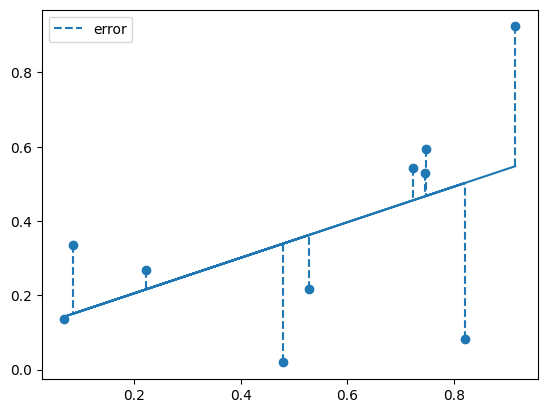

In [19]:
b1,b0 = np.polyfit(x, b, 1)
plt.scatter(x,b)
plt.plot(x, b1*x+b0)
plt.vlines(x, ymin = b, ymax = b1*x+b0, label = 'error', linestyle='dashed')
plt.legend()
plt.show()

### $L^1 - Regression$
* less sensitive to outliers than least squares regression

The L1 regression uses $L^1$ norm for regularization.

#### Transform to optimization problem: 

Objective function: $\min \varepsilon = \displaystyle \min_x b-Ax$

$L^1$ regression uses $L^1$-norm to find the vector $x$:
$$\displaystyle\min_x \|b-Ax|\|_1 = \min (\sum_{i=1}^n |b-Ax|)$$

which is equivalent to: 
$$
\begin{align*}
\displaystyle\min \sum_i t_i\\
\text{subject to} && t_i - |\mathbf{b}-\mathbf{Ax}| = 0 
\end{align*}
$$
and therefore we have:
$$
\begin{align*}
\displaystyle\min \sum_i t_i\\
\text{subject to} && -\mathbf{t}-\mathbf{Ax} \leq -\mathbf{b} \\
&& -\mathbf{t} + \mathbf{Ax} \leq \mathbf{b}
\end{align*}
$$


### Linear Algebra Review

Let $Ax = b$ and A be a $m \times n$

* case 1: m = n (square matrix)
    - unique solution: If matrix A is non-singular
    - infinitely many solution: If matrix A is singular and b $\in$ span(A)
    - no solution: If matrix A is singular and b $\notin$ span(A)
* case 2: m < n (underdetermined)
    - infinitely many solution: If matrix A is non-singular or matrix A is singular and b $\in$ span(A)
    - no solution: If matrix A is singular and b $\notin$ span(A)
* case 3: m > n (overdetermined)
    - unique solution: If matrix A is non-singular and b $\in$ span(A)
    - infinitely many solution: If matrix A is non-singular and b $\in$ span(A)
    - no solution: If matrix A is non-singular and b $\notin$ span(A) or If matrix A is singular and b $\notin$ span(A)


soure: MATH 307 notes

For linear optimization, we also have overdetermined and underdetermined systems. 

**Overdetermined systems:**

The matrix A has m > n, so there are more constraints than variables. This will most likely result in no solution, so there is little possibility that we have $\mathbf{b}=\mathbf{Ax}$. So, the goal is to minimize the error $\varepsilon$ to get the best fit line. 

**Underdetermined systems:**

The matrix has m < n, so there are more variables than constraints. It is likely to have infinitely many solutions. This is different than the previous explanations. The solution is unbounded if there are infinitely many solutions, so we need to have a way to select the feasible region to obtain an optimal solution instead of minimizing the error.

source: Math 441 notes

### $L^1$ regression application: Real estate price prediction

The dataset can be found from: https://statso.io/real-estate-prediction-case-study/

**1. Define the problem**

In [22]:
import pandas as pd

data = pd.read_csv('Real_Estate.csv')
data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


Given the house age, distance to the MRT station, number of convenience stores, latitude, and longitude, find the best-fit line to get the approximate house price per unit area. 

**2. Identify the variables and parameters**

Variables: 

1. $x_1$: house age
2. $x_2$: distance to the nearest MRT station
3. $x_3$: nearest convenience stores
4. $x_4$: latitude
5. $x_5$: longitude
6. b = house price of unit area

Multiple Linear Regression:
$$
\mathbf{b} = Ax+ \varepsilon \\
\mathbf{b} = \beta_0 + \beta_1 \mathbf{x_1} + \beta_2 \mathbf{x_2} + \beta_3 \mathbf{x_3} + \beta_4 \mathbf{x_4} + \beta_5 \mathbf{x_5}+ \varepsilon \\
\mathbf{b} = 
\begin{bmatrix}
1 & x_{11} & x_{12} & x_{13} & x_{14} & x_{15} \\
1 & x_{21} & x_{22} & x_{23} & x_{24} & x_{25} \\
1 & x_{31} & x_{32} & x_{33} & x_{34} & x_{35} \\
1 & x_{41} & x_{42} & x_{43} & x_{44} & x_{45} \\
1 & x_{51} & x_{52} & x_{53} & x_{54} & x_{55} \\
\vdots & \vdots \\
1 & x_{n1} & x_{n2} & x_{n3} & x_{n4} & x_{n5} \\
\end{bmatrix}

\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\beta_3 \\
\beta_4 \\
\beta_5 \\
\end{bmatrix}
+ \varepsilon
$$

**3. State the assumptions and constraints:**

Assumptions:

- let the data be divided into training and testing data by 0.8 and 0.2

**5.Evaluation**

compare to least squares regression